In [1]:
# Initialize the workspace
from pymongo import MongoClient
import pprint
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
# Always make it pretty.
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Connect with Mongo to place data into a database
client = MongoClient('localhost', 27017)
db = client['metacritic']

In [ ]:
# Examine the altcountry collection
altcountry = db['altcountry']

In [ ]:
altcountry.count_documents({})

In [ ]:
pprint.pprint(list(altcountry.find()))

In [ ]:
# Place this data into a dataframe
test_df = pd.DataFrame(list(altcountry.find())).set_index('_id')

In [ ]:
test_df.drop(columns='test', inplace=True)

In [ ]:
test_df.drop(test_df.index[0], inplace=True)

In [3]:
pd.set_option('display.max_rows', None)
#test_df.drop_duplicates('album', inplace=True)

In [ ]:
test_df['score'].hist(bins=30)

In [ ]:
soul = db['soul']

In [ ]:
soul_df = pd.DataFrame(list(soul.find())).set_index('_id')

In [ ]:
soul_df['score'].hist(bins=20)

In [ ]:
soul_df.info()

In [ ]:
alternative = db['alternative']
alternative_df = pd.DataFrame(list(alternative.find())).set_index('_id')
alternative_df.shape

In [19]:
# Create Mongo collections in which to place data
# NOTE TO SELF: excluding comedy & psychedelic as it looks like they weren't
# scraped properly/they only have ~10 entries
altcountry = db['altcountry']
alternative = db['alternative']
blues = db['blues']
country = db['country']
dance = db['dance']
electronic = db['electronic']
experimental = db['experimental']
folk = db['folk']
house = db['house']
indie = db['indie']
jazz = db['jazz']
latin = db['latin']
metal = db['metal']
pop = db['pop']
punk = db['punk']
rap = db['rap']
rb = db['rb']
reggae = db['reggae']
rock = db['rock']
singersongwriter = db['singersongwriter']
soul = db['soul']
soundtrack = db['soundtrack']
techno = db['techno']
vocal = db['vocal']
world = db['world']
coll_list = [altcountry, alternative, blues, country,
             dance, electronic, experimental, folk, house, indie,
             jazz, latin, metal, pop, punk, rap,
             rb, reggae, rock, singersongwriter, soul,
             soundtrack, techno, vocal, world]

In [20]:
# I'm only interested in the keys as strings but copy/pasted this in for 
# convenience
genre_dict = {'alt-country': 6, 'alternative': 38, 'blues':6,
              'country': 25, 'dance':6, 'electronic': 79, 'experimental':10,
              'folk': 22, 'house':5, 'indie': 74, 'jazz': 13, 'latin':2,
              'metal':6, 'pop':32, 'punk':4, 'rap':48,
              'rb':26, 'reggae':3, 'rock': 132, 'singer-songwriter':9,
              'soul':7, 'soundtrack':2, 'techno':6, 'vocal':4, 'world':2}

In [73]:
# Create a function that turns collections into dataframes
def coll_to_df(collections, names):
    '''
    Given a list of MongoDB collections and their associated names (for
    record keeping), this function returns that name and the collection as a
    dataframe
    
    Parameters:
    collections (list): list of MongoDB collections
    names (list of strings): list of names associated with collections, input
    in order
    
    Returns:
    df_list (list of tuples): list of name-dataframe tuples
    '''
    df_list = []
    for coll, name in zip(collections,names):
        df = pd.DataFrame(list(coll.find())).set_index('_id')
        if 'test' in df.columns:
            df.drop(columns='test', inplace=True)
        if True in df.duplicated(['album', 'artist']).values:
            df.drop_duplicates(['album', 'artist'], inplace=True)
        if coll == altcountry:
            df.drop(df.index[0], inplace=True)
        df_list.append((name, df))
    return df_list

In [74]:
x = coll_to_df(coll_list, genre_dict.keys())

In [76]:
# Create a function that turns dataframes into score series
def df_to_scores(df_list):
    '''
    Given a list of name-dataframe tuples (created in coll_to_df), this 
    function returns 
    
    Parameters:
    df_list (list of tuples): list of name-dataframe tuples
    
    Returns:
    score_list (list of tuples): list of name-series tuples
    '''
    score_list = []
    for df in df_list:
        score_array = df[1]['score']
        score_list.append((df[0], score_array))
    return score_list

In [80]:
w = df_to_scores(x)

In [91]:
# Create a function that plots histograms of our score counts
def plot_scores(score_list):
    '''
    Given a list of name-array tuples (created in df_to_scores), this 
    function plots their histograms 
    
    Parameters:
    score_list (list of tuples): list of name-series tuples
    '''
    fig, axs = plt.subplots(5,5, figsize=(12,12),
                            sharex = True, sharey = True)
    for (name, arr), ax in zip(score_list, axs.flatten()):
        ax.hist(arr)
        ax.set_title(name.capitalize())
    fig.tight_layout
    fig.suptitle('Review Score Counts by Genre')

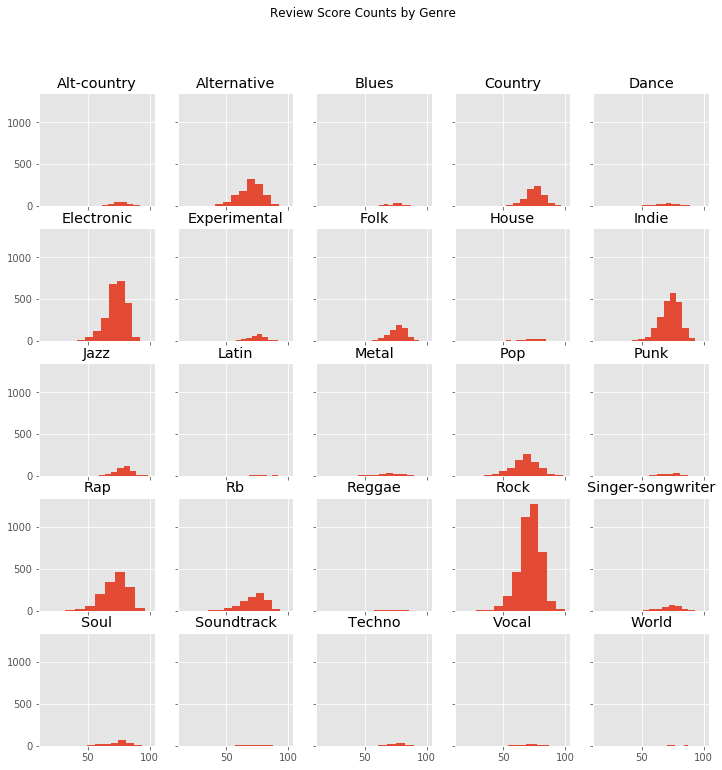

In [92]:
plot_scores(w)

In [93]:
# Create a function that provides a count of how many counts of scores each
# genre has
def count_scores(score_list):
    '''
    Given a list of name-array tuples (created in df_to_scores), this 
    function provides the count of scores in each genre 
    
    Parameters:
    score_list (list of tuples): list of name-series tuples
    
    Returns:
    score_dict (dict): dictionary of genres and respective review counts
    '''
    score_dict = {}
    for name, array in score_list:
        score_dict[name] = len(array)
        print('The {} genre has {} recorded scores'.format(name, len(array)))
    return score_dict

In [95]:
count_scores(w)

The alt-country genre has 161 recorded scores
The alternative genre has 1117 recorded scores
The blues genre has 155 recorded scores
The country genre has 748 recorded scores
The dance genre has 174 recorded scores
The electronic genre has 2358 recorded scores
The experimental genre has 284 recorded scores
The folk genre has 648 recorded scores
The house genre has 127 recorded scores
The indie genre has 2219 recorded scores
The jazz genre has 376 recorded scores
The latin genre has 55 recorded scores
The metal genre has 154 recorded scores
The pop genre has 928 recorded scores
The punk genre has 109 recorded scores
The rap genre has 1419 recorded scores
The rb genre has 772 recorded scores
The reggae genre has 68 recorded scores
The rock genre has 3948 recorded scores
The singer-songwriter genre has 257 recorded scores
The soul genre has 189 recorded scores
The soundtrack genre has 51 recorded scores
The techno genre has 154 recorded scores
The vocal genre has 96 recorded scores
The wo

{'alt-country': 161,
 'alternative': 1117,
 'blues': 155,
 'country': 748,
 'dance': 174,
 'electronic': 2358,
 'experimental': 284,
 'folk': 648,
 'house': 127,
 'indie': 2219,
 'jazz': 376,
 'latin': 55,
 'metal': 154,
 'pop': 928,
 'punk': 109,
 'rap': 1419,
 'rb': 772,
 'reggae': 68,
 'rock': 3948,
 'singer-songwriter': 257,
 'soul': 189,
 'soundtrack': 51,
 'techno': 154,
 'vocal': 96,
 'world': 37}